<a href="https://colab.research.google.com/github/uervitonsantos/Exercicios_Metodos_Quantitativos/blob/main/Exercicios_Metodos_Quantitativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# rpy2 fornece uma interface que permite executar R em processos Python.
!pip install rpy2

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
# install e chamada dos pacotes necessarios para o analise dos dados
if(!require(tidyverse))
install.packages("tidyverse")
if(!require(RVAideMemoire))
install.packages("nortest")
if(!require(psych))
install.packages("psych")
if(!require(rstatix))
install.packages("rstatix")
if(!require(car))
install.packages("car")
if(!require(DescTools))
install.packages("DescTools")

In [ ]:
%%R
library(dplyr)
library(tidyverse)
library(tidyr)
library(ggplot2)
library(nortest)
library(psych)
library(rstatix)
library(car)
library(DescTools)

##1 - Para os exercícios a seguir avalie os pressupostos do modelo ANOVA.

(I) - Um restaurante oferece um molho
especial que acompanha um peixe.
A maioria dos clientes regulares é
composta por alunos, funcionários e
executivos. Alguns clientes pedem o
molho especial, mas o dono do
restaurante acredita que os alunos e
os funcionários gostam mais do
molho especial do que os
executivos. Considerando 13 dias
representativos para cada grupo,
existe nesse caso alguma relação
significativa? Use α = 5%.

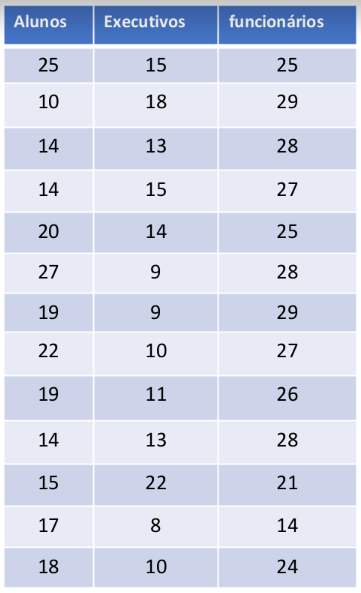

In [5]:
%%R
# construção das listas com os valores para cada grupo
Alunos <- c(25, 10, 14, 14, 20, 27, 19, 22, 19, 14, 15, 17, 18)
Executivos <- c(15, 18, 13, 15, 14, 9, 9, 10,11, 13, 22, 8, 10)
Funcionários <- c( 25, 29, 28, 27, 25, 28, 29, 27, 26, 28, 21, 14, 24)

# montando um dataFrame com os grupos selecionados
clientes <- data.frame(Alunos, Executivos, Funcionários)

#str é uma função para verificar os tipos de dados de cada grupos
str(clientes)

'data.frame':	13 obs. of  3 variables:
 $ Alunos      : num  25 10 14 14 20 27 19 22 19 14 ...
 $ Executivos  : num  15 18 13 15 14 9 9 10 11 13 ...
 $ Funcionários: num  25 29 28 27 25 28 29 27 26 28 ...


# **Hipóteses:**

H0: Os grupos possuem a mesma variância

H1: Pelo menos um grupo tem mediana diferente das demais

In [6]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
alunos <- shapiro.test(Alunos)
executivos <- shapiro.test(Executivos)
funcionarios <- shapiro.test(Funcionários)

In [7]:
%%R
# resultado do test de shapiro-wilk para o grupo Alunos
alunos


	Shapiro-Wilk normality test

data:  Alunos
W = 0.96593, p-value = 0.8414



In [8]:
%%R
# resultado do test de shapiro-wilk para o grupo Executivos
executivos


	Shapiro-Wilk normality test

data:  Executivos
W = 0.91919, p-value = 0.2446



In [9]:
%%R
# resultado do test de shapiro-wilk para o grupo Funcionarios
funcionarios


	Shapiro-Wilk normality test

data:  Funcionários
W = 0.77607, p-value = 0.003592



In [10]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
clie <- clientes %>% pivot_longer(cols = everything(), names_to = "cliente")
clie

# A tibble: 39 × 2
   cliente      value
   <chr>        <dbl>
 1 Alunos          25
 2 Executivos      15
 3 Funcionários    25
 4 Alunos          10
 5 Executivos      18
 6 Funcionários    29
 7 Alunos          14
 8 Executivos      13
 9 Funcionários    28
10 Alunos          14
# … with 29 more rows
# ℹ Use `print(n = ...)` to see more rows


In [11]:
%%R
# teste de Levene para verificar a homogeneidade de variancias
# https://pt.wikipedia.org/wiki/Teste_de_Levene
leveneTest(value ~ cliente, data = clie, center=mean)

Levene's Test for Homogeneity of Variance (center = mean)
      Df F value Pr(>F)
group  2  0.3527 0.7052
      36               


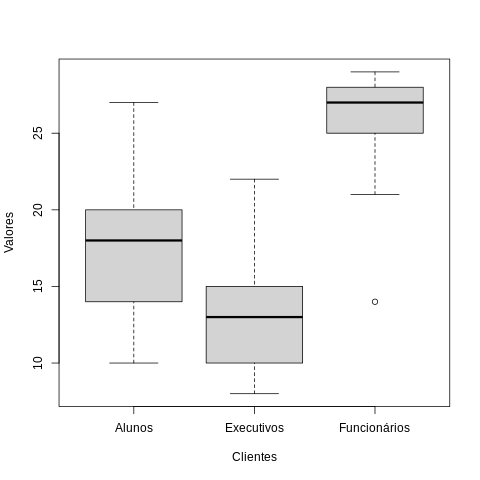

In [12]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ cliente, data = clie, ylab="Valores", xlab="Clientes")

In [13]:
# teste ANOVA para análisar a variância entre os grupos
# https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia
%%R
anova_cliente <- aov(value ~ cliente, data = clie)
summary(anova_cliente)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cliente      2 1046.0   523.0   28.06 4.51e-08 ***
Residuals   36  670.9    18.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [14]:
%%R
# teste de tukey para análizar entre quais grupos existe as maiores variâncias
# https://en.wikipedia.org/wiki/Tukey's_range_test
TUKEY <- TukeyHSD(x=anova_cliente, "cliente", conf.level=0.95, ordered = TRUE)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ cliente, data = clie)

$cliente
                             diff      lwr       upr     p adj
Alunos-Executivos        5.153846 1.014970  9.292722 0.0118142
Funcionários-Executivos 12.615385 8.476508 16.754261 0.0000000
Funcionários-Alunos      7.461538 3.322662 11.600415 0.0002618



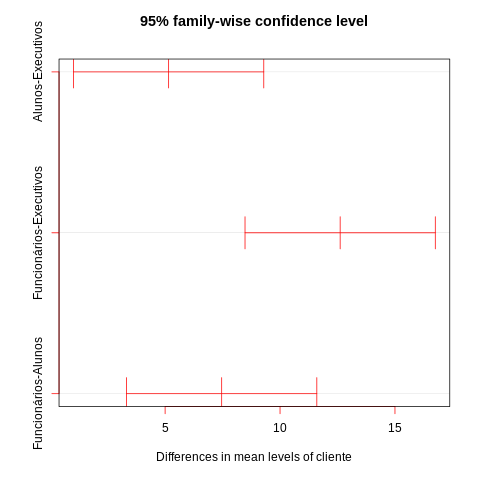

In [15]:
%%R
# grafico do teste de tuket que demostra as variâncias entre os grupos
# https://r-graph-gallery.com/84-tukey-test.html
plot(TUKEY, las=0, col="red")

(II) - Uma empresa coletou dados
sobre a quantidade de sacos
de arroz produzidos em três
regiões durante quinze dias.
Ela deseja verificar se
existem diferenças entre as
regiões, segundo as
quantidades de sacos de
arroz produzidos por região
apresentadas na tabela ao
lado. Use 95% de confiança.

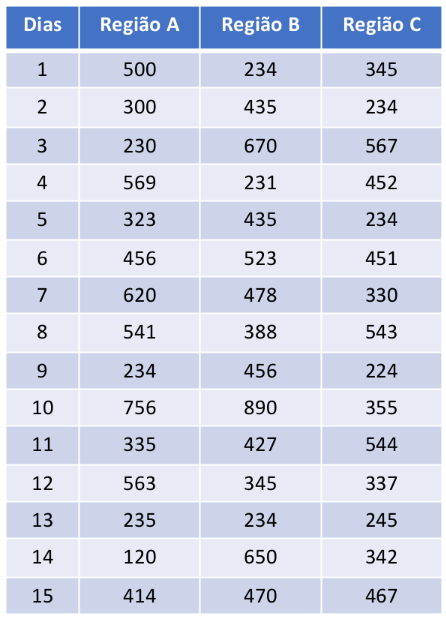

In [22]:
%%R
# construção das listas com os valores para cada grupo
Dias <- c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
Região_A <- c(500,300,230,569,323,456,620,541,234,756,335,563,235,120,414)
Região_B <- c(234,435,670,231,435,523,478,388,456,890,427,345,234,650,470)
Região_C <- c(345,234,567,452,234,451,330,543,224,355,544,337,245,342,467)

# montando um dataFrame com os grupos selecionados
regiao <- data.frame(Região_A, Região_B, Região_C)

#str é uma função para verificar os tipos de dados de cada grupos
str(regiao)

'data.frame':	15 obs. of  3 variables:
 $ Região_A: num  500 300 230 569 323 456 620 541 234 756 ...
 $ Região_B: num  234 435 670 231 435 523 478 388 456 890 ...
 $ Região_C: num  345 234 567 452 234 451 330 543 224 355 ...


# **Hipóteses**:

H0: Os grupos possuem a mesma variância

H1: Pelo menos um grupo tem mediana diferente das demais

In [23]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
Região_A <- shapiro.test(Região_A)
Região_B <- shapiro.test(Região_B)
Região_C <- shapiro.test(Região_C)

In [24]:
%%R
# resultado do test de shapiro-wilk para a Região_A
Região_A


	Shapiro-Wilk normality test

data:  Região_A
W = 0.96848, p-value = 0.835



In [25]:
%%R
# resultado do test de shapiro-wilk para a Região_B
Região_B


	Shapiro-Wilk normality test

data:  Região_B
W = 0.91388, p-value = 0.1553



In [26]:
%%R
# resultado do test de shapiro-wilk para a Região_C
Região_C


	Shapiro-Wilk normality test

data:  Região_C
W = 0.90764, p-value = 0.1246



In [27]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
regiao <- regiao %>% pivot_longer(cols = everything(), names_to = "regiao")
regiao

# A tibble: 45 × 2
   regiao   value
   <chr>    <dbl>
 1 Região_A   500
 2 Região_B   234
 3 Região_C   345
 4 Região_A   300
 5 Região_B   435
 6 Região_C   234
 7 Região_A   230
 8 Região_B   670
 9 Região_C   567
10 Região_A   569
# … with 35 more rows
# ℹ Use `print(n = ...)` to see more rows


In [28]:
%%R
# teste de Levene para verificar a homogeneidade de variancias
# https://pt.wikipedia.org/wiki/Teste_de_Levene
leveneTest(value ~ regiao, data = regiao, center=mean)

Levene's Test for Homogeneity of Variance (center = mean)
      Df F value Pr(>F)
group  2  0.9714 0.3869
      42               


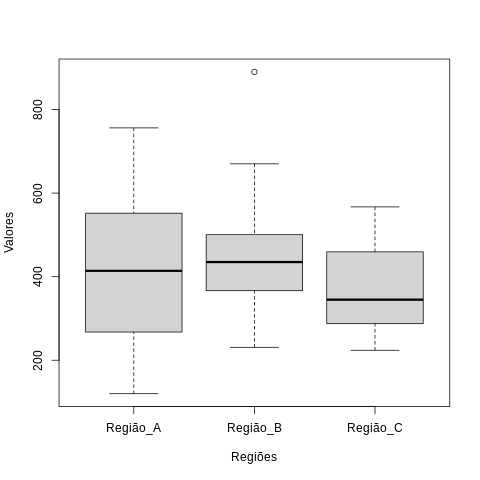

In [29]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ regiao, data = regiao, ylab="Valores", xlab="Regiões")

In [30]:
%%R
# teste ANOVA para análisar a variância entre os grupos
# https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia
anova_regiao <- aov(value ~ regiao, data = regiao)
summary(anova_regiao)

            Df  Sum Sq Mean Sq F value Pr(>F)
regiao       2   47911   23955   0.926  0.404
Residuals   42 1086930   25879               


In [31]:
%%R
# teste de tukey para análizar entre quais grupos existe as maiores variâncias
# https://en.wikipedia.org/wiki/Tukey's_range_test
TUKEY <- TukeyHSD(anova_regiao, "regiao", ordered = TRUE)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ regiao, data = regiao)

$regiao
                      diff        lwr      upr     p adj
Região_A-Região_C 35.06667 -107.64559 177.7789 0.8224967
Região_B-Região_C 79.73333  -62.97892 222.4456 0.3722098
Região_B-Região_A 44.66667  -98.04559 187.3789 0.7290677



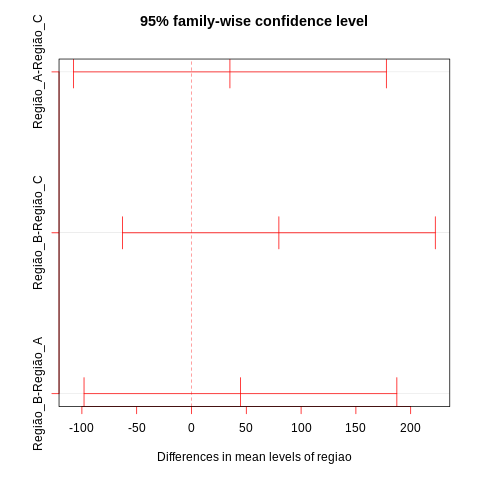

In [32]:
%%R
# grafico do teste de tuket que demostra as variâncias entre os grupos
# https://r-graph-gallery.com/84-tukey-test.html
plot(TUKEY, las=0, col="red")

(III) - Um comerciante coletou informações sobre o número de vezes
em que pessoas consumiram um sorvete com um tipo de
cobertura especial. A tabela apresenta o resultado. Analise se
existe diferença entre os grupos com 95% de confiança.

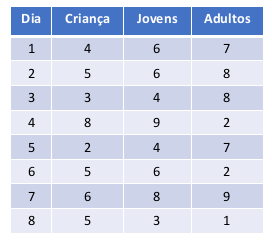

In [33]:
%%R
# construção das listas com os valores para cada grupo
Crianca <- c(4, 5, 3, 8, 2, 5, 6, 5)
Jovem <- c(6, 6, 4, 9, 4, 6, 8, 3)
Adulto <- c(7, 8, 8, 2, 7, 2, 9, 1)

# montando um dataFrame com os grupos selecionados
clientes <- data.frame(Crianca, Jovem, Adulto)

# str é uma função para verificar os tipos de dados de cada grupos
str(clientes)

'data.frame':	8 obs. of  3 variables:
 $ Crianca: num  4 5 3 8 2 5 6 5
 $ Jovem  : num  6 6 4 9 4 6 8 3
 $ Adulto : num  7 8 8 2 7 2 9 1


# **Hipóteses:**

H0: Os grupos possuem a mesma variância

H1: Pelo menos um grupo tem mediana diferente das demais

In [35]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
crianca <- shapiro.test(Crianca)
jovem <- shapiro.test(Jovem)
adulto  <- shapiro.test(Adulto)

In [36]:
%%R
# resultado do test de shapiro-wilk para o grupo Crianca
crianca


	Shapiro-Wilk normality test

data:  Crianca
W = 0.96188, p-value = 0.8278



In [37]:
%%R
# resultado do test de shapiro-wilk para o grupo Jovem
jovem


	Shapiro-Wilk normality test

data:  Jovem
W = 0.93283, p-value = 0.5421



In [38]:
%%R
# resultado do test de shapiro-wilk para o grupo Adulto
adulto


	Shapiro-Wilk normality test

data:  Adulto
W = 0.81984, p-value = 0.04648



In [39]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
cliente <- clientes %>% pivot_longer(cols = everything(), names_to = "cliente")
cliente

# A tibble: 24 × 2
   cliente value
   <chr>   <dbl>
 1 Crianca     4
 2 Jovem       6
 3 Adulto      7
 4 Crianca     5
 5 Jovem       6
 6 Adulto      8
 7 Crianca     3
 8 Jovem       4
 9 Adulto      8
10 Crianca     8
# … with 14 more rows
# ℹ Use `print(n = ...)` to see more rows


In [40]:
%%R
# teste de Levene para verificar a homogeneidade de variancias
# https://pt.wikipedia.org/wiki/Teste_de_Levene
leveneTest(value ~ cliente, data = clie, center=mean)

Levene's Test for Homogeneity of Variance (center = mean)
      Df F value Pr(>F)
group  2  0.3527 0.7052
      36               


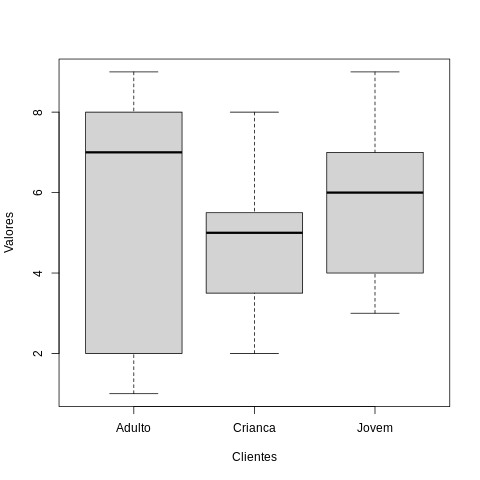

In [41]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ cliente, data = cliente, ylab="Valores", xlab="Clientes")

In [42]:
# teste ANOVA para análisar a variância entre os grupos
# https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia
%%R
anova_cliente <- aov(value ~ cliente, data = cliente)
summary(anova_cliente)

            Df Sum Sq Mean Sq F value Pr(>F)
cliente      2   4.33   2.167   0.358  0.703
Residuals   21 127.00   6.048               


In [43]:
%%R
# teste de tukey para análizar entre quais grupos existe as maiores variâncias
# https://en.wikipedia.org/wiki/Tukey's_range_test
TUKEY <- TukeyHSD(x=anova_cliente, "cliente", conf.level=0.95, ordered = TRUE)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ cliente, data = cliente)

$cliente
               diff       lwr      upr     p adj
Adulto-Crianca 0.75 -2.349281 3.849281 0.8162998
Jovem-Crianca  1.00 -2.099281 4.099281 0.6991062
Jovem-Adulto   0.25 -2.849281 3.349281 0.9774929



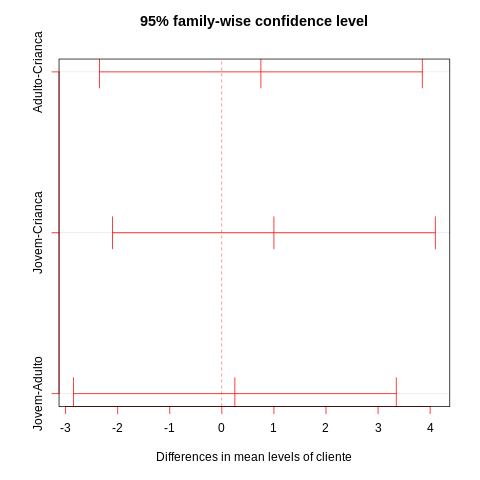

In [44]:
%%R
# grafico do teste de tuket que demostra as variâncias entre os grupos
# https://r-graph-gallery.com/84-tukey-test.html
plot(TUKEY, las=0, col="red")

# 2 - Faça um resumo dos trabalhos (SANT'ANA, 2021) e (VIEIRA, 2016) , refazendo e explicando todos os testes no R. Destaque os pressupostos da ANOVA e descreva os objetivos de cada teste realizado.

# 3 - Considere o processo de produção de uma fibra sintética, no qual o experimentador quer conhecer a influência da porcentagem de algodão na resistência da fibra. Para isto, foi realizado um experimento totalmente aleatorizado, no qual diversos níveis de porcentagem de algodão foram avaliados com respeito à resistência da fibra. Um ponto importante no planejamento do experimento é que para cada nível do fator (porcentagem de algodão), os outros fatores que influenciam o processo (como o meio ambiente, máquina, matéria prima, etc) devem apresentar um padrão homogêneo de variabilidade. No experimento, tomamos 5 níveis para a porcentagem de algodão e 5 replicações.

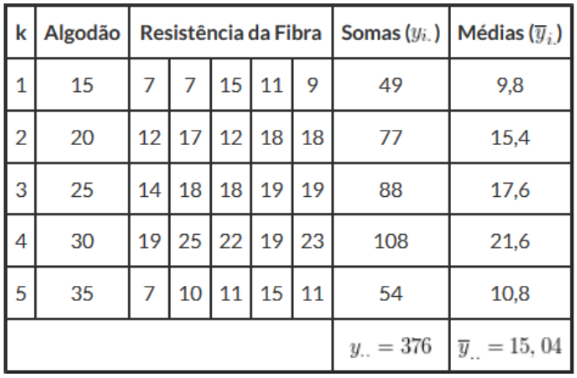

In [45]:
%%R
# construção das listas com os valores para cada grupo
Algodao_15 <- c(7,7,15,11,9)
Algodao_20 <- c(12,17,12,18,18)
Algodao_25 <- c(14,18,18,19,19)
Algodao_30 <- c(19,25,22,19,23)
Algodao_35 <- c(7,10,11,15,11)

# montando um dataFrame com os grupos selecionados
algodao <- data.frame(Algodao_15, Algodao_20, Algodao_25, Algodao_30, Algodao_35)

#str é uma função para verificar os tipos de dados de cada grupos
str(algodao)

'data.frame':	5 obs. of  5 variables:
 $ Algodao_15: num  7 7 15 11 9
 $ Algodao_20: num  12 17 12 18 18
 $ Algodao_25: num  14 18 18 19 19
 $ Algodao_30: num  19 25 22 19 23
 $ Algodao_35: num  7 10 11 15 11


In [46]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
algodao <- algodao %>% pivot_longer(cols = everything(), names_to = "algodao")
algodao

# A tibble: 25 × 2
   algodao    value
   <chr>      <dbl>
 1 Algodao_15     7
 2 Algodao_20    12
 3 Algodao_25    14
 4 Algodao_30    19
 5 Algodao_35     7
 6 Algodao_15     7
 7 Algodao_20    17
 8 Algodao_25    18
 9 Algodao_30    25
10 Algodao_35    10
# … with 15 more rows
# ℹ Use `print(n = ...)` to see more rows


In [47]:
%%R
# teste ANOVA para análisar a variância entre os grupos
# https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia
anova_algodao <- aov(value ~ algodao, data = algodao)
summary(anova_algodao)

            Df Sum Sq Mean Sq F value   Pr(>F)    
algodao      4  475.8  118.94   14.76 9.13e-06 ***
Residuals   20  161.2    8.06                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


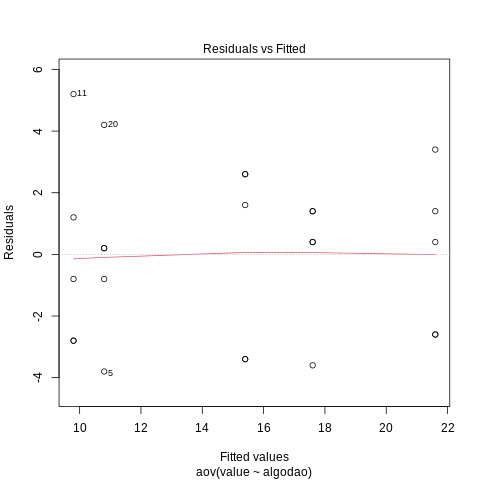

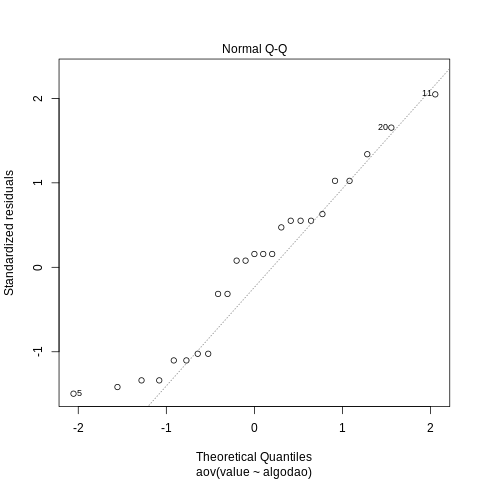

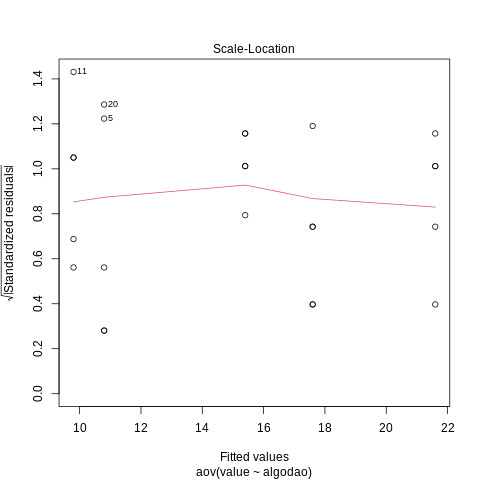

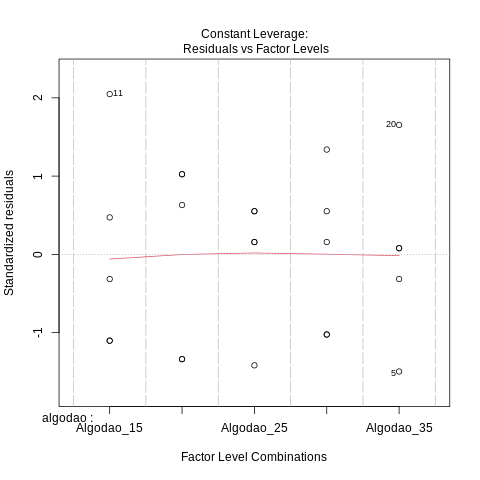

In [49]:
%%R
plot(anova_algodao)

In [51]:
%%R
# teste de tukey para análizar entre quais grupos existe as maiores variâncias
# https://en.wikipedia.org/wiki/Tukey's_range_test
TUKEY <- TukeyHSD(anova_algodao, "algodao", ordered = TRUE, conf.level=0.95)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ algodao, data = algodao)

$algodao
                      diff        lwr       upr     p adj
Algodao_35-Algodao_15  1.0 -4.3729583  6.372958 0.9797709
Algodao_20-Algodao_15  5.6  0.2270417 10.972958 0.0385024
Algodao_25-Algodao_15  7.8  2.4270417 13.172958 0.0025948
Algodao_30-Algodao_15 11.8  6.4270417 17.172958 0.0000190
Algodao_20-Algodao_35  4.6 -0.7729583  9.972958 0.1162970
Algodao_25-Algodao_35  6.8  1.4270417 12.172958 0.0090646
Algodao_30-Algodao_35 10.8  5.4270417 16.172958 0.0000624
Algodao_25-Algodao_20  2.2 -3.1729583  7.572958 0.7372438
Algodao_30-Algodao_20  6.2  0.8270417 11.572958 0.0188936
Algodao_30-Algodao_25  4.0 -1.3729583  9.372958 0.2101089



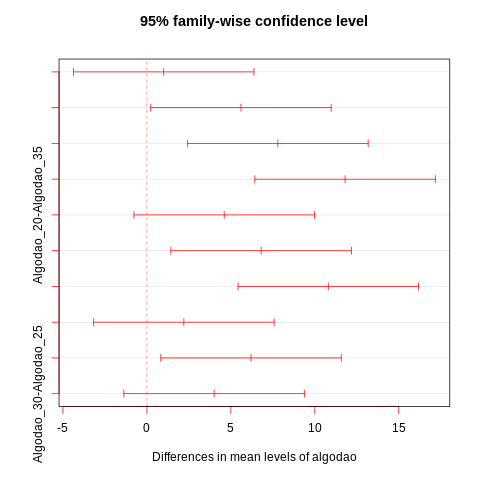

In [62]:
%%R
# grafico do teste de tuket que demostra as variâncias entre os grupos
# https://r-graph-gallery.com/84-tukey-test.html
plot(TUKEY, las=0, col="red")

In [63]:
%%R
qq <- table(algodao$algodao)
qq


Algodao_15 Algodao_20 Algodao_25 Algodao_30 Algodao_35 
         5          5          5          5          5 


In [65]:
%%R
# teste de Qui-quadrado. teste de hipóteses que se destina a encontrar um valor 
#da dispersão para duas variáveis categóricas nominais e avaliar a associação 
#existente entre variáveis qualitativas.

# https://pt.wikipedia.org/wiki/Teste_qui-quadrado_de_Pearson
tqq <- chisq.test(qq)
tqq


	Chi-squared test for given probabilities

data:  qq
X-squared = 0, df = 4, p-value = 1



In [67]:
%%R
tqq$stdres


Algodao_15 Algodao_20 Algodao_25 Algodao_30 Algodao_35 
         0          0          0          0          0 


# Exercício

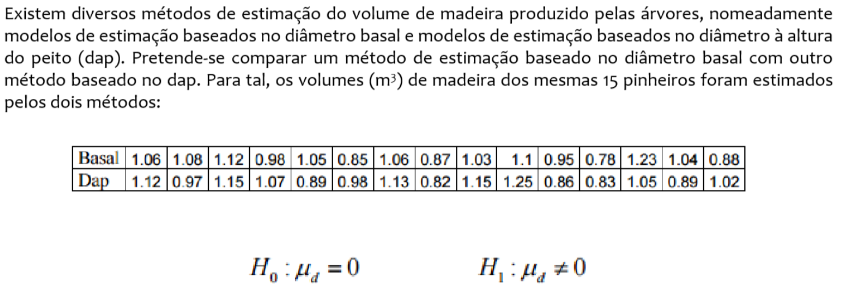

In [83]:
%%R
# construção das listas com os valores para cada grupo
Basal <- c(1.06, 1.08, 1.12, 0.98, 1.05, 0.85, 1.06, 0.87, 1.03, 1.1, 0.95, 0.78, 1.23, 1.04, 0.88)
Dap <- c(1.12, 0.97, 1.15, 1.07, 0.89, 1.13, 0.82, 1.15, 1.25, 0.86, 0.86, 0.83, 1.05, 0.89, 1.02)

# montando um dataFrame com os grupos selecionados
metodo <- data.frame(Basal, Dap)

#str é uma função para verificar os tipos de dados de cada grupos
str(metodo)

'data.frame':	15 obs. of  2 variables:
 $ Basal: num  1.06 1.08 1.12 0.98 1.05 0.85 1.06 0.87 1.03 1.1 ...
 $ Dap  : num  1.12 0.97 1.15 1.07 0.89 1.13 0.82 1.15 1.25 0.86 ...


In [86]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
metodo <- metodo %>% pivot_longer(cols = everything(), names_to = "metodo")
metodo

# A tibble: 30 × 2
   metodo value
   <chr>  <dbl>
 1 Basal   1.06
 2 Dap     1.12
 3 Basal   1.08
 4 Dap     0.97
 5 Basal   1.12
 6 Dap     1.15
 7 Basal   0.98
 8 Dap     1.07
 9 Basal   1.05
10 Dap     0.89
# … with 20 more rows
# ℹ Use `print(n = ...)` to see more rows


In [90]:
%%R
wilcox.test(value ~ metodo, data = metodo, paired = FALSE, exact = FALSE, correct = TRUE,
            conf.int = FALSE, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  value by metodo
W = 110, p-value = 0.9338
alternative hypothesis: true location shift is not equal to 0



In [102]:
%%R
metodo %>% group_by(metodo) %>% get_summary_stats(value, type = "median_iqr")

# A tibble: 2 × 5
  metodo variable     n median   iqr
  <chr>  <fct>    <dbl>  <dbl> <dbl>
1 Basal  value       15   1.04 0.155
2 Dap    value       15   1.02 0.25 


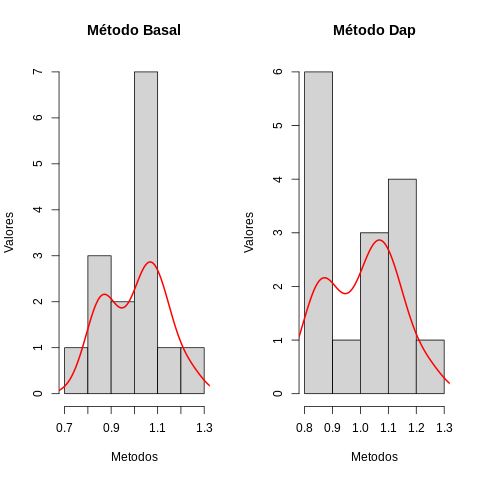

In [117]:
%%R
par(mfrow=c(1,2))
hist(metodo$value[metodo$metodo == "Basal"], ylab="Valores", xlab="Metodos", main="Método Basal")
lines(density(metodo$value),
 lwd = 2,
 col = "red")
hist(metodo$value[metodo$metodo == "Dap"], ylab="Valores", xlab="Metodos", main="Método Dap")
lines(density(metodo$value),
 lwd = 2,
 col = "red")